# Fitting models to data

## Hand-coded

### Linear fit 

a =  -3.450290937221579
b =  0.2720478922624365
Variance of a:  0.07382045597687381
Variance of b:  0.0018667251224914318
Covariance of a and b:  -0.0113190479517869
Correlation coefficient: r =  -0.9642315816536216
Goodness of the fit: Q =  0.7220625794132156
Pearson's correlation coefficient: r_xy =  0.8267176065250417


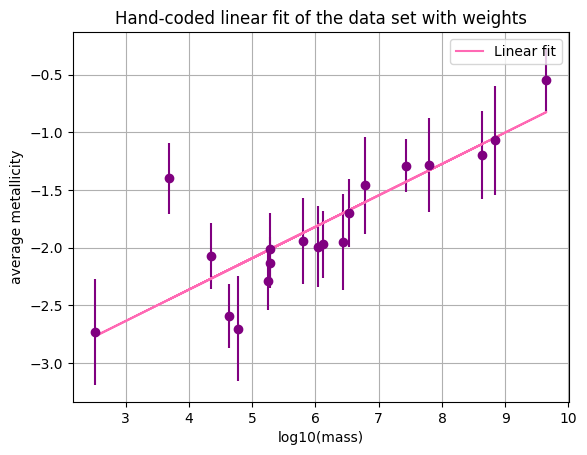

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math
data = np.loadtxt("mmr_lg.dat")

log_mass = data[:, 0]
avg_metal = data[:, 1]
err_mass = data[:, 2]
err_metal = data[:, 3]

#y = a+bx
def y(a, b, x): 
    return a+b*x


#calculate a & b (best fit parameters)
def linear_params(x, y, sigma): 
    S = np.sum(1/sigma**2)
    S_x = np.sum(x/sigma**2)
    S_y = np.sum(y/sigma**2)
    S_xx = np.sum(x**2/sigma**2)
    S_xy = np.sum(x*y/sigma**2)
    delta = S*S_xx - S_x**2
    a = (S_xx*S_y - S_x*S_xy)/delta
    b = (S*S_xy - S_x*S_y)/delta
    return S, S_x, S_y, S_xx, S_xy, delta, a, b

S, S_x, S_y, S_xx, S_xy, delta, a, b = linear_params(log_mass, avg_metal, err_metal)

print("a = ", a)
print("b = ", b)


#calculate uncertainty, covariance & correlation coefficient
sigma_a_2 = S_xx/delta
sigma_b_2 = S/delta

print("Variance of a: ", sigma_a_2)
print("Variance of b: ", sigma_b_2)


cov_ab = -S_x/delta
print("Covariance of a and b: ", cov_ab)


r_ab = -S_x/np.sqrt(S*S_xx)
print("Correlation coefficient: r = ", r_ab)


#calculate the goodness of the fit
def chi_2(a, b, x, y, sigma):
    return np.sum(((y-a-b*x)/sigma)**2)

chi_sq = chi_2(a, b, log_mass, avg_metal, err_metal)
N = len(data)
Q = scipy.special.gammainc((N-2)/2, chi_sq/2) 

print("Goodness of the fit: Q = ", Q) 


#calculate the Pearson`s coefficient 
r_xy = np.sum((log_mass-np.mean(log_mass))*(avg_metal-np.mean(avg_metal))) / ((np.sqrt(np.sum((log_mass-np.mean(log_mass))**2))) * (np.sqrt(np.sum((avg_metal-np.mean(avg_metal))**2))))
print("Pearson's correlation coefficient: r_xy = ", r_xy)

plt.errorbar(log_mass, avg_metal, yerr=err_metal, fmt='o', color="purple")
plt.plot(log_mass, y(a, b, log_mass), color="hotpink", label="Linear fit")
plt.xlabel("log10(mass)")
plt.ylabel("average metallicity")
plt.title("Hand-coded linear fit of the data set with weights")
plt.legend()
plt.grid()
plt.show()


## Using built-in functions

### Linear fit

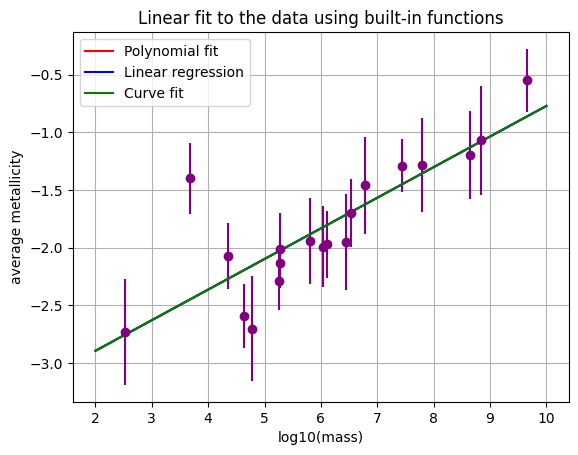

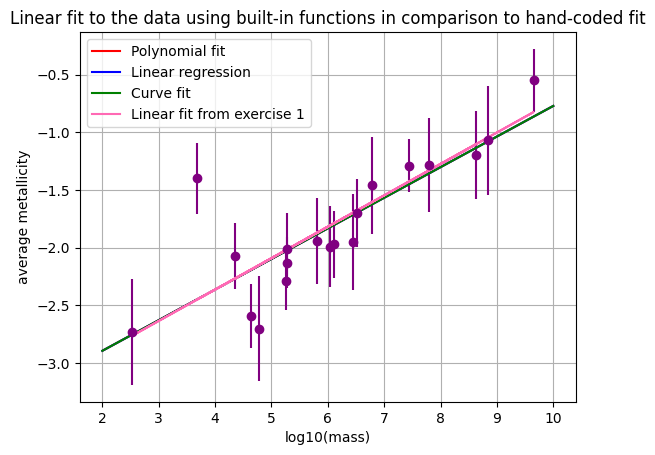

Coefficients from poly fit:  -3.42260414 + 0.26508195·x 

Intercept from linear regression: a =  -3.4226041413391686
Slope from linear regression: b =  0.26508194879061703 

Intercept from curve fit: a =  -3.4226041433360166
Slope from curve fit: b =  0.26508194916090716 

Intercept from exercise 1: a =  -3.450290937221579
Slope from exercise 1: b =  0.2720478922624365 

Comparison curve fit and linear fit exercise 1: 
Difference intercept:  0.027686793885562277
Difference slope:  0.006965943101529315


In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy.optimize import curve_fit
from numpy.polynomial.polynomial import Polynomial

#polynomial fit
poly_fit = Polynomial.fit(log_mass, avg_metal, 1)
poly_fit_converted = poly_fit.convert() #polynomial fits scales data from -1 to 1, convert it back to original data range
poly_fit_window = Polynomial.fit(log_mass, avg_metal, 1, [-1, 1]) #no need to use convert then 

#linear regression
lin_slope, lin_intercept, lin_rvalue, lin_pvalue, lin_stderr  = linregress(log_mass, avg_metal)

def lin_reg(x_vals):
    return lin_slope * x_vals + lin_intercept

#curve fit
def curve_model(x, a, b):
    return a + b*x 

curve_params, curve_covar = curve_fit(curve_model, log_mass, avg_metal)
a_curve = curve_params[0]
b_curve = curve_params[1]


x_range =  np.linspace(2, 10, 100)

plt.errorbar(log_mass, avg_metal, yerr=err_metal, fmt='o', color="purple")
plt.plot(x_range, poly_fit_converted(x_range), color="red", label="Polynomial fit")
plt.plot(x_range,lin_reg(x_range), color="blue", label="Linear regression")
plt.plot(x_range,curve_model(x_range, a_curve, b_curve), color="green", label="Curve fit")
plt.xlabel("log10(mass)")
plt.ylabel("average metallicity")
plt.title("Linear fit to the data using built-in functions")
plt.legend()
plt.grid()
plt.show()

plt.errorbar(log_mass, avg_metal, yerr=err_metal, fmt='o', color="purple")
plt.plot(x_range, poly_fit_converted(x_range), color="red", label="Polynomial fit")
plt.plot(x_range,lin_reg(x_range), color="blue", label="Linear regression")
plt.plot(x_range,curve_model(x_range, a_curve, b_curve), color="green", label="Curve fit")
plt.plot(log_mass, y(a, b, log_mass), color="hotpink", label="Linear fit from exercise 1")
plt.title("Linear fit to the data using built-in functions in comparison to hand-coded fit")
plt.xlabel("log10(mass)")
plt.ylabel("average metallicity")
plt.legend()
plt.grid()
plt.show()


print("Coefficients from poly fit: ", poly_fit_window, "\n")

print("Intercept from linear regression: a = ", lin_intercept)
print("Slope from linear regression: b = ", lin_slope, "\n")

print("Intercept from curve fit: a = ", a_curve)
print("Slope from curve fit: b = ", b_curve, "\n")

print("Intercept from exercise 1: a = ", a)
print("Slope from exercise 1: b = ", b, "\n")

print("Comparison curve fit and linear fit exercise 1: ")
print("Difference intercept: ", np.abs(a - a_curve))
print("Difference slope: ", np.abs(b - b_curve))

### Parabolic fit

Best-fit parameters:  [ 0.04289123 -0.28273052 -1.78249654]
Uncertainties:  [0.02020925 0.26484491 0.83021738]
Covariance matrix:  [[ 4.08413668e-04 -5.28264435e-03  1.58808711e-02]
 [-5.28264435e-03  7.01428270e-02 -2.16412581e-01]
 [ 1.58808711e-02 -2.16412581e-01  6.89260898e-01]]
Coefficient of determinantion: R**2 =  0.7195857031247714
Goodness-of-fit: Q =  0.5152228501568281


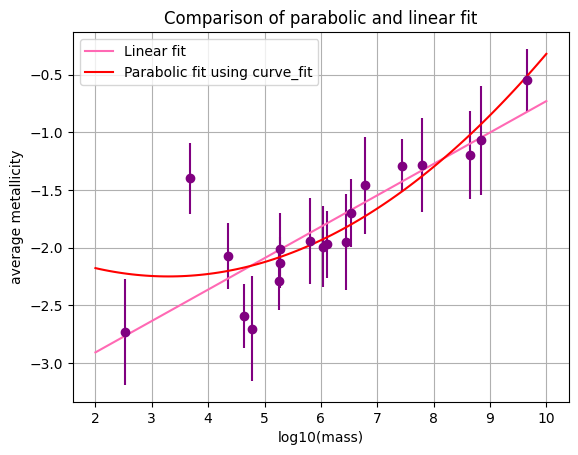

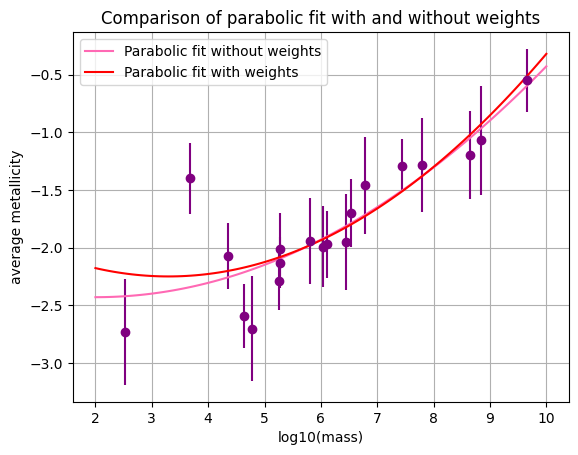

In [8]:
# use curve fit model because immediately get best fit parameters and covariance

def parabola(x, a, b, c): 
    return a*x**2 + b*x + c

#get best fit parameters and covariance
popt, pcov, infodict, m, i = curve_fit(parabola, log_mass, avg_metal, sigma=err_metal, full_output=True) #add weights
popt2, pcov2 = curve_fit(parabola, log_mass, avg_metal) #no weights


#get uncertainties of parameters by taking sqrt of the diagonal elements of the covariance matrix (see documentation)
perr = np.sqrt(np.diag(pcov))

#covariance is just pcov

#correlation coefficient for parabola: coefficient of determination 
SS_tot = np.sum((avg_metal - np.mean(avg_metal))**2) #total sum of squares
SS_res = np.sum((avg_metal - parabola(log_mass, *popt))**2) #residual sum of squares
R_sqr = 1 - SS_res/SS_tot


#get goodness of fit 
residual_vals = infodict['fvec'] 
chi_squared = np.sum(residual_vals**2)
Q_parab2 = scipy.special.gammainc((N-3)/2, chi_squared/2) 


print("Best-fit parameters: ", popt)
print("Uncertainties: ", perr)
print("Covariance matrix: ", pcov)
print("Coefficient of determinantion: R**2 = ", R_sqr)
print("Goodness-of-fit: Q = ", Q_parab2)


plt.errorbar(log_mass, avg_metal, yerr=err_metal, fmt='o', color="purple")
plt.plot(x_range, y(a, b, x_range), color="hotpink", label="Linear fit")
plt.plot(x_range, parabola(x_range, *popt), color="red", label="Parabolic fit using curve_fit")
plt.title("Comparison of parabolic and linear fit")
plt.xlabel("log10(mass)")
plt.ylabel("average metallicity")
plt.legend()
plt.grid()
plt.show()

plt.errorbar(log_mass, avg_metal, yerr=err_metal, fmt='o', color="purple")
plt.plot(x_range, parabola(x_range, *popt2), color="hotpink", label="Parabolic fit without weights")
plt.plot(x_range, parabola(x_range, *popt), color="red", label="Parabolic fit with weights")
plt.title("Comparison of parabolic fit with and without weights")
plt.xlabel("log10(mass)")
plt.ylabel("average metallicity")
plt.legend()
plt.grid()
plt.show()